In [1]:
import math

import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

In [2]:
images = [
  "L4/apple.jpg",
  "L4/orange.jpg",
  "L4/banana.jpg",
  "L4/honeydew.png",
  "L4/melon.png"
]

In [3]:
ims = []

min_width, min_height = math.inf, math.inf

for image in images:
  im = cv2.imread(image)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

  min_width = min(min_width, im.shape[0])
  min_height = min(min_height, im.shape[1])

  print(im.shape)
  ims.append(im)

(1500, 1500, 3)
(730, 1000, 3)
(600, 600, 3)
(1000, 1000, 3)
(1080, 1080, 3)


In [4]:
scaled_ims = []

for im in ims:
  if im.shape[0] > im.shape[1]:
    target_height = math.floor(im.shape[1] * (min_width / im.shape[0]))
    scaled_im = cv2.resize(im, (min_width, target_height))
  else:
    target_width = math.floor(im.shape[0] * (min_height / im.shape[1]))
    scaled_im = cv2.resize(im, (target_width, min_height))

  print(scaled_im.shape)
  scaled_ims.append(scaled_im)

(600, 600, 3)
(600, 438, 3)
(600, 600, 3)
(600, 600, 3)
(600, 600, 3)


In [5]:
R = []
G = []
B = []

for scaled_im in scaled_ims:
  R.append(np.ravel(scaled_im[:, :, 0]))
  G.append(np.ravel(scaled_im[:, :, 1]))
  B.append(np.ravel(scaled_im[:, :, 2]))

In [6]:
def plot_histograms(title, R, G, B):
  plt.figure(figsize=(12, 10))
  plt.suptitle(title)
  plt.subplots_adjust(top=0.925)

  plt.subplot(2, 2, 1)
  plt.hist(R, bins=256)
  plt.yscale('log')
  plt.title("Red Channel")
  plt.ylabel("Frequency")
  plt.xlabel("Intensity")

  plt.subplot(2, 2, 2)
  plt.hist(G, bins=256)
  plt.yscale('log')
  plt.title("Green Channel")
  plt.ylabel("Frequency")
  plt.xlabel("Intensity")

  plt.subplot(2, 2, 3)
  plt.hist(B, bins=256)
  plt.yscale('log')
  plt.title("Blue Channel")
  plt.ylabel("Frequency")
  plt.xlabel("Intensity")

  plt.show()

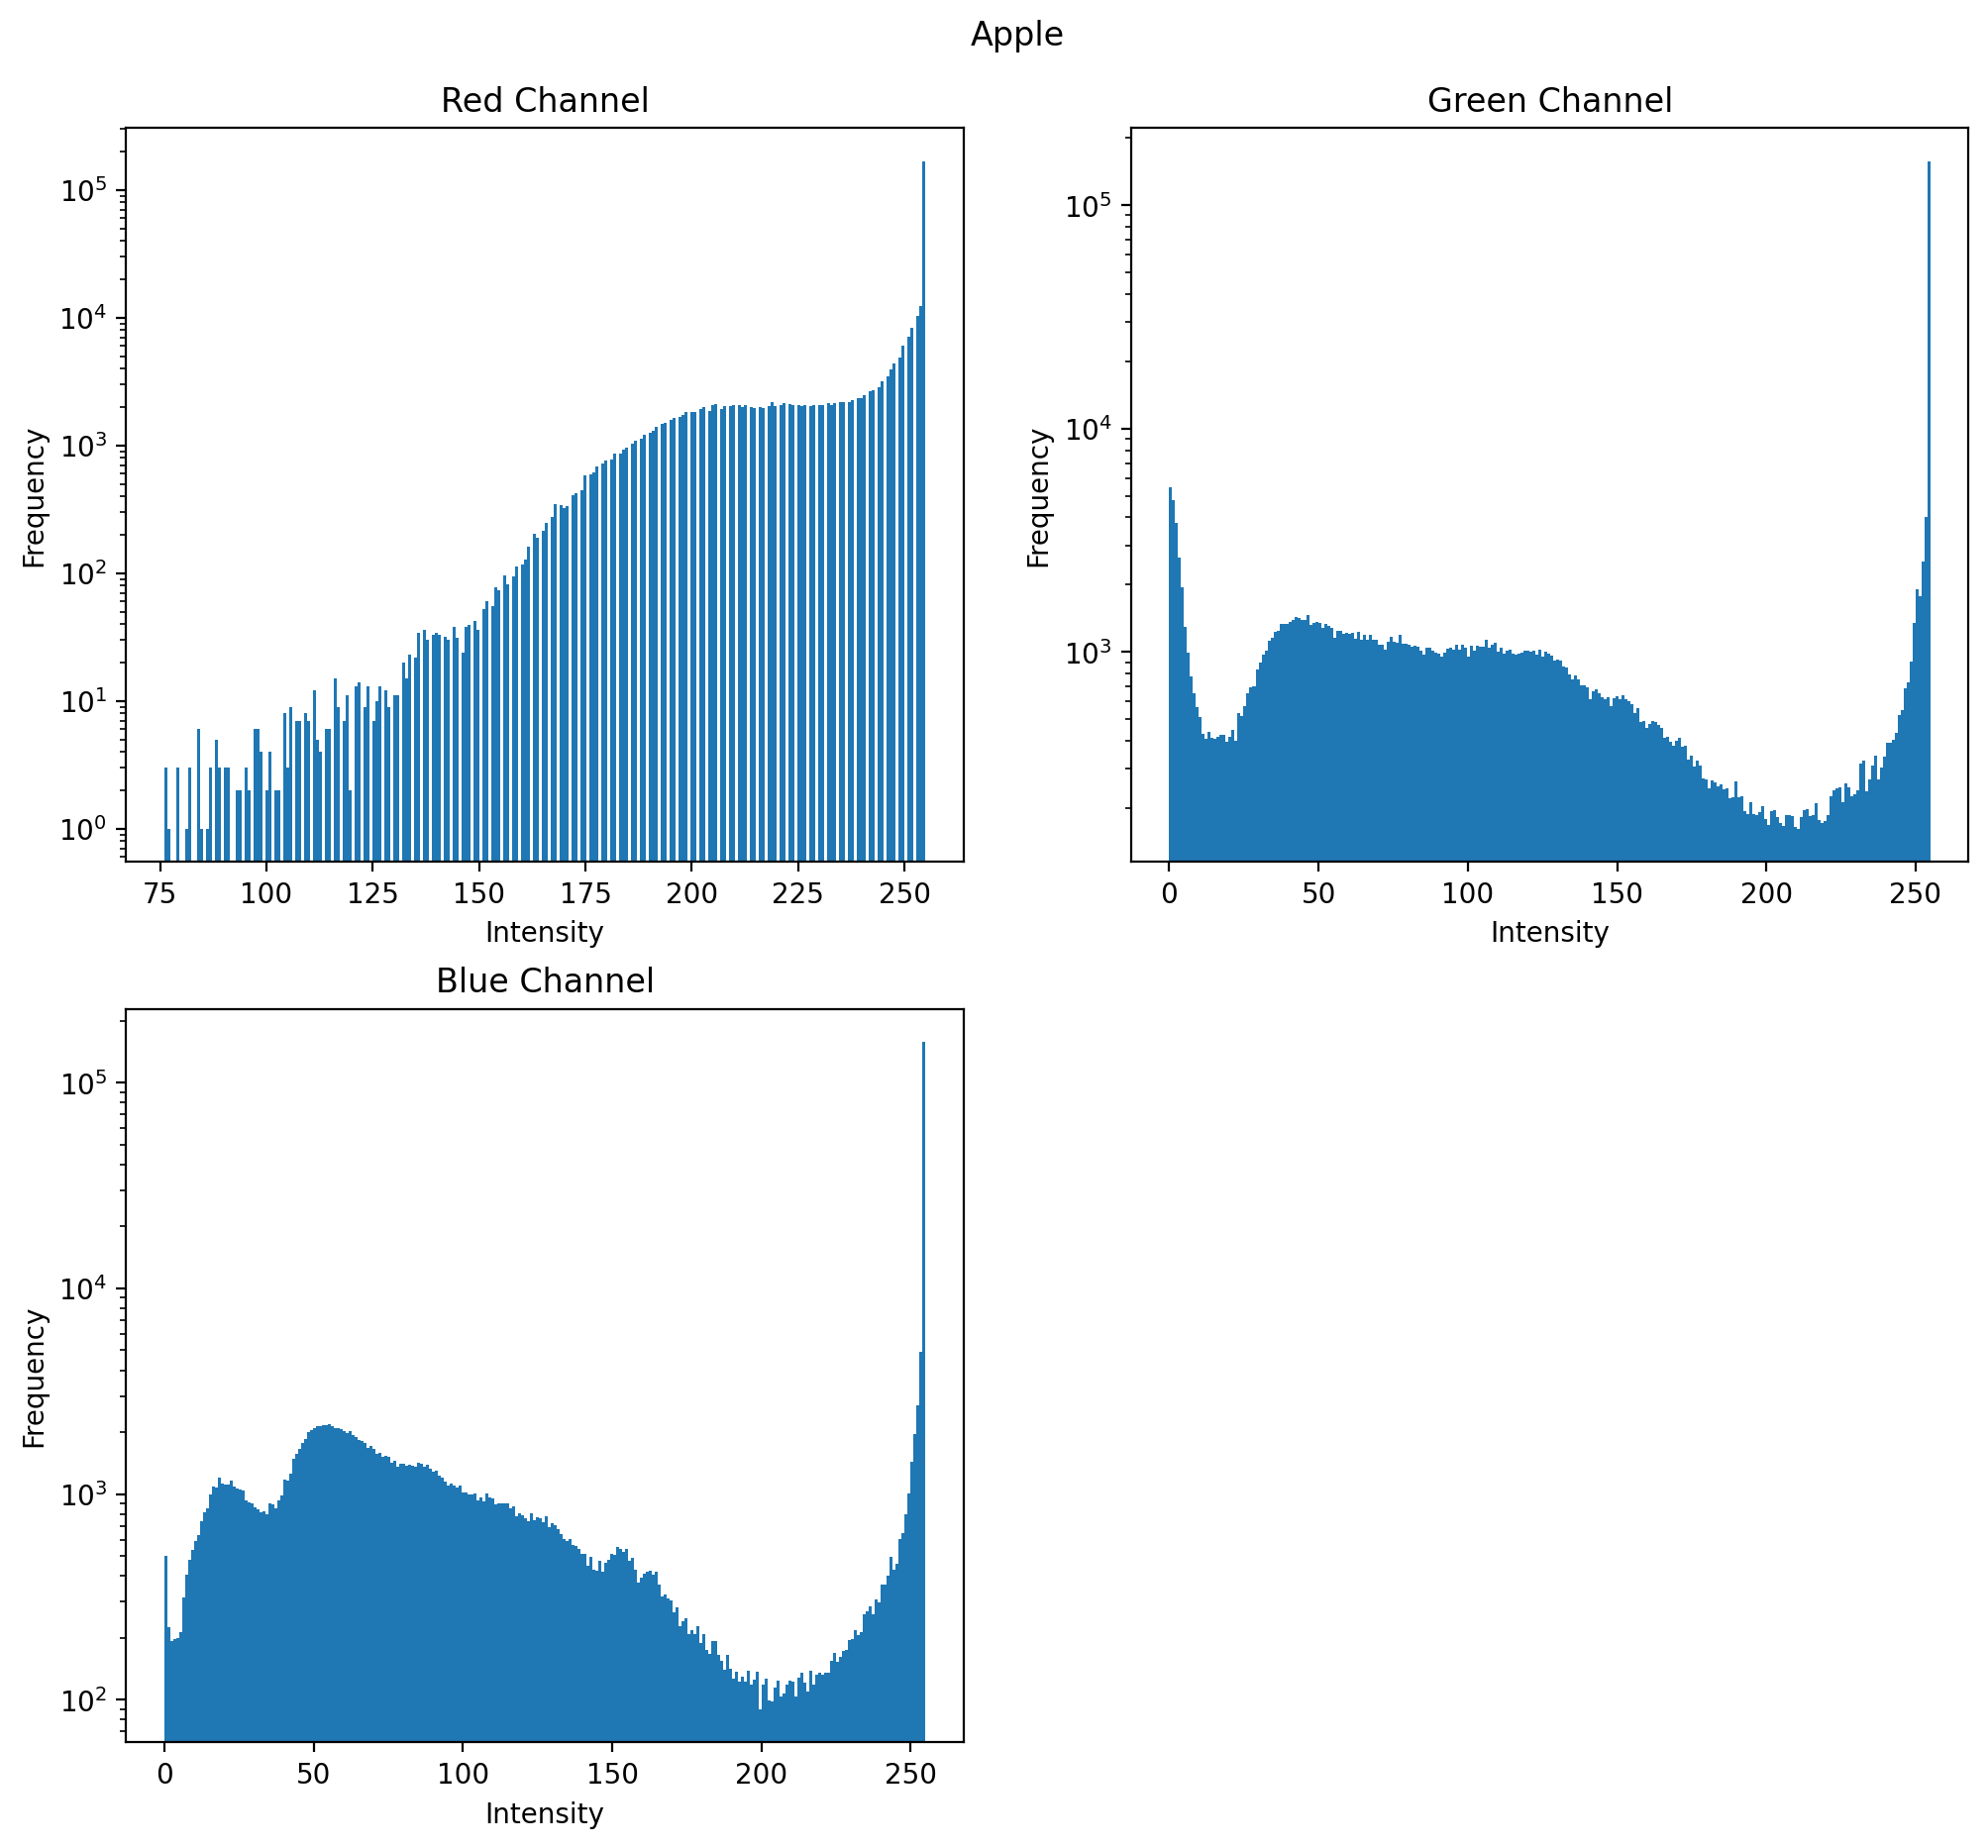

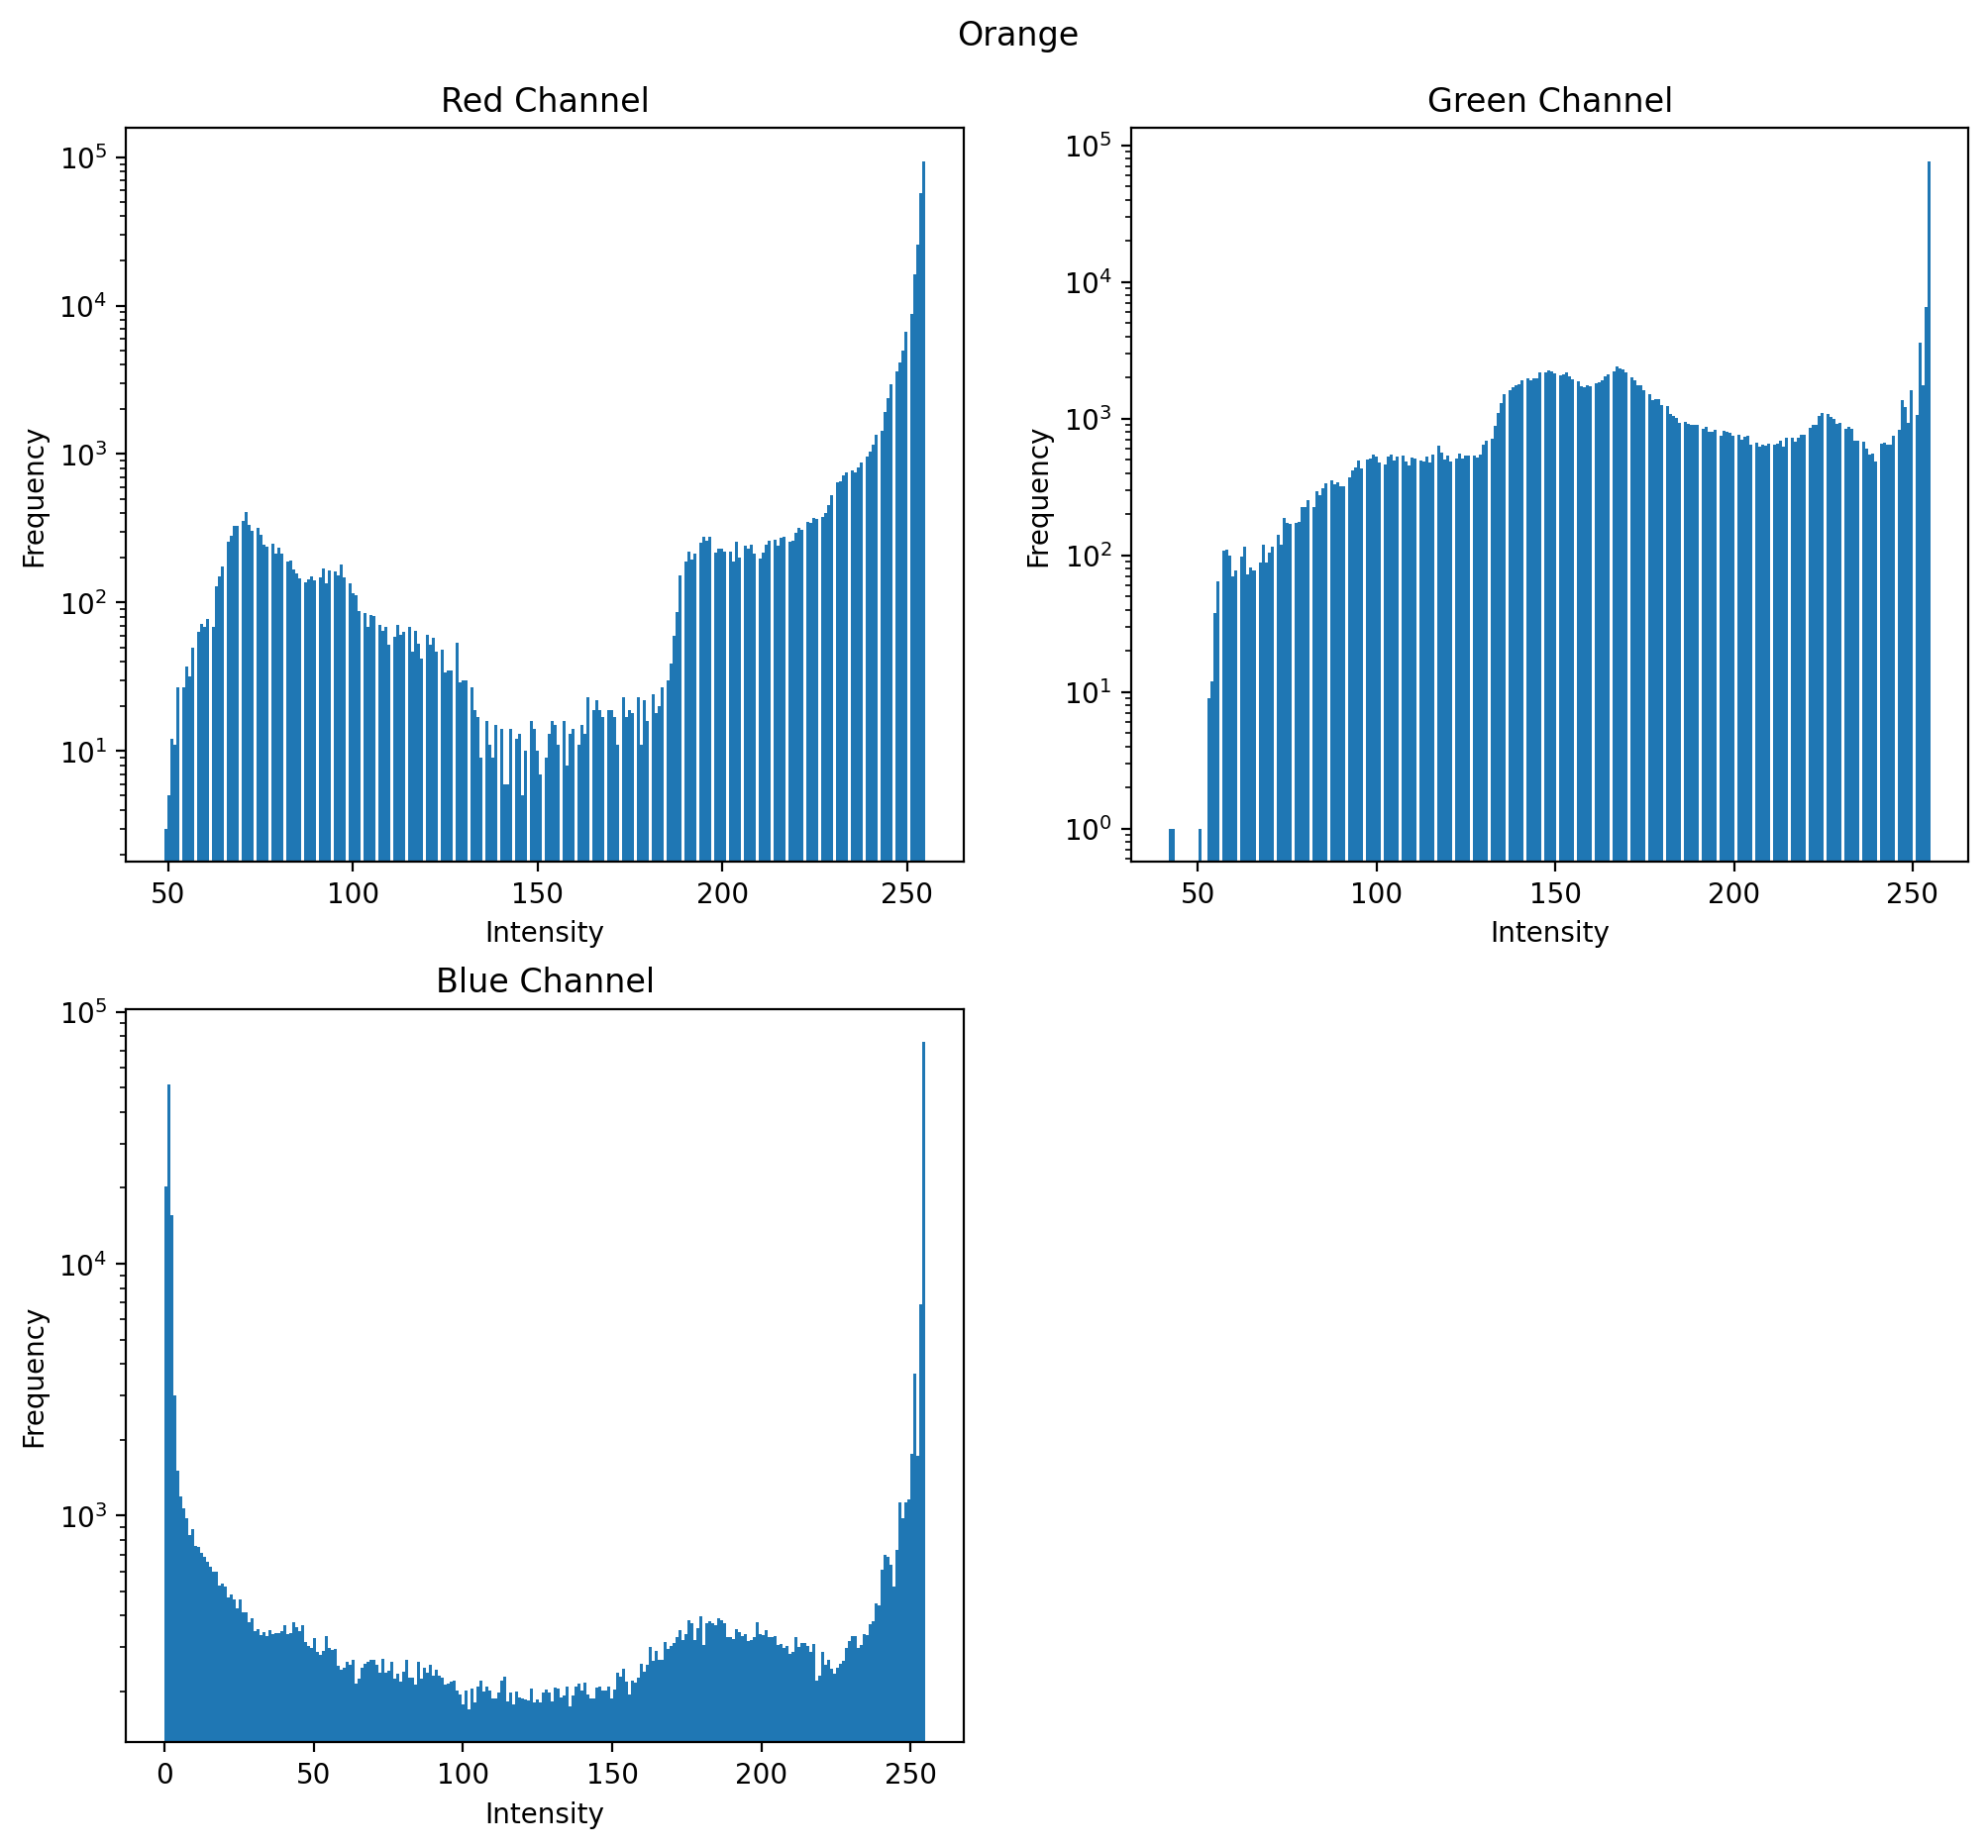

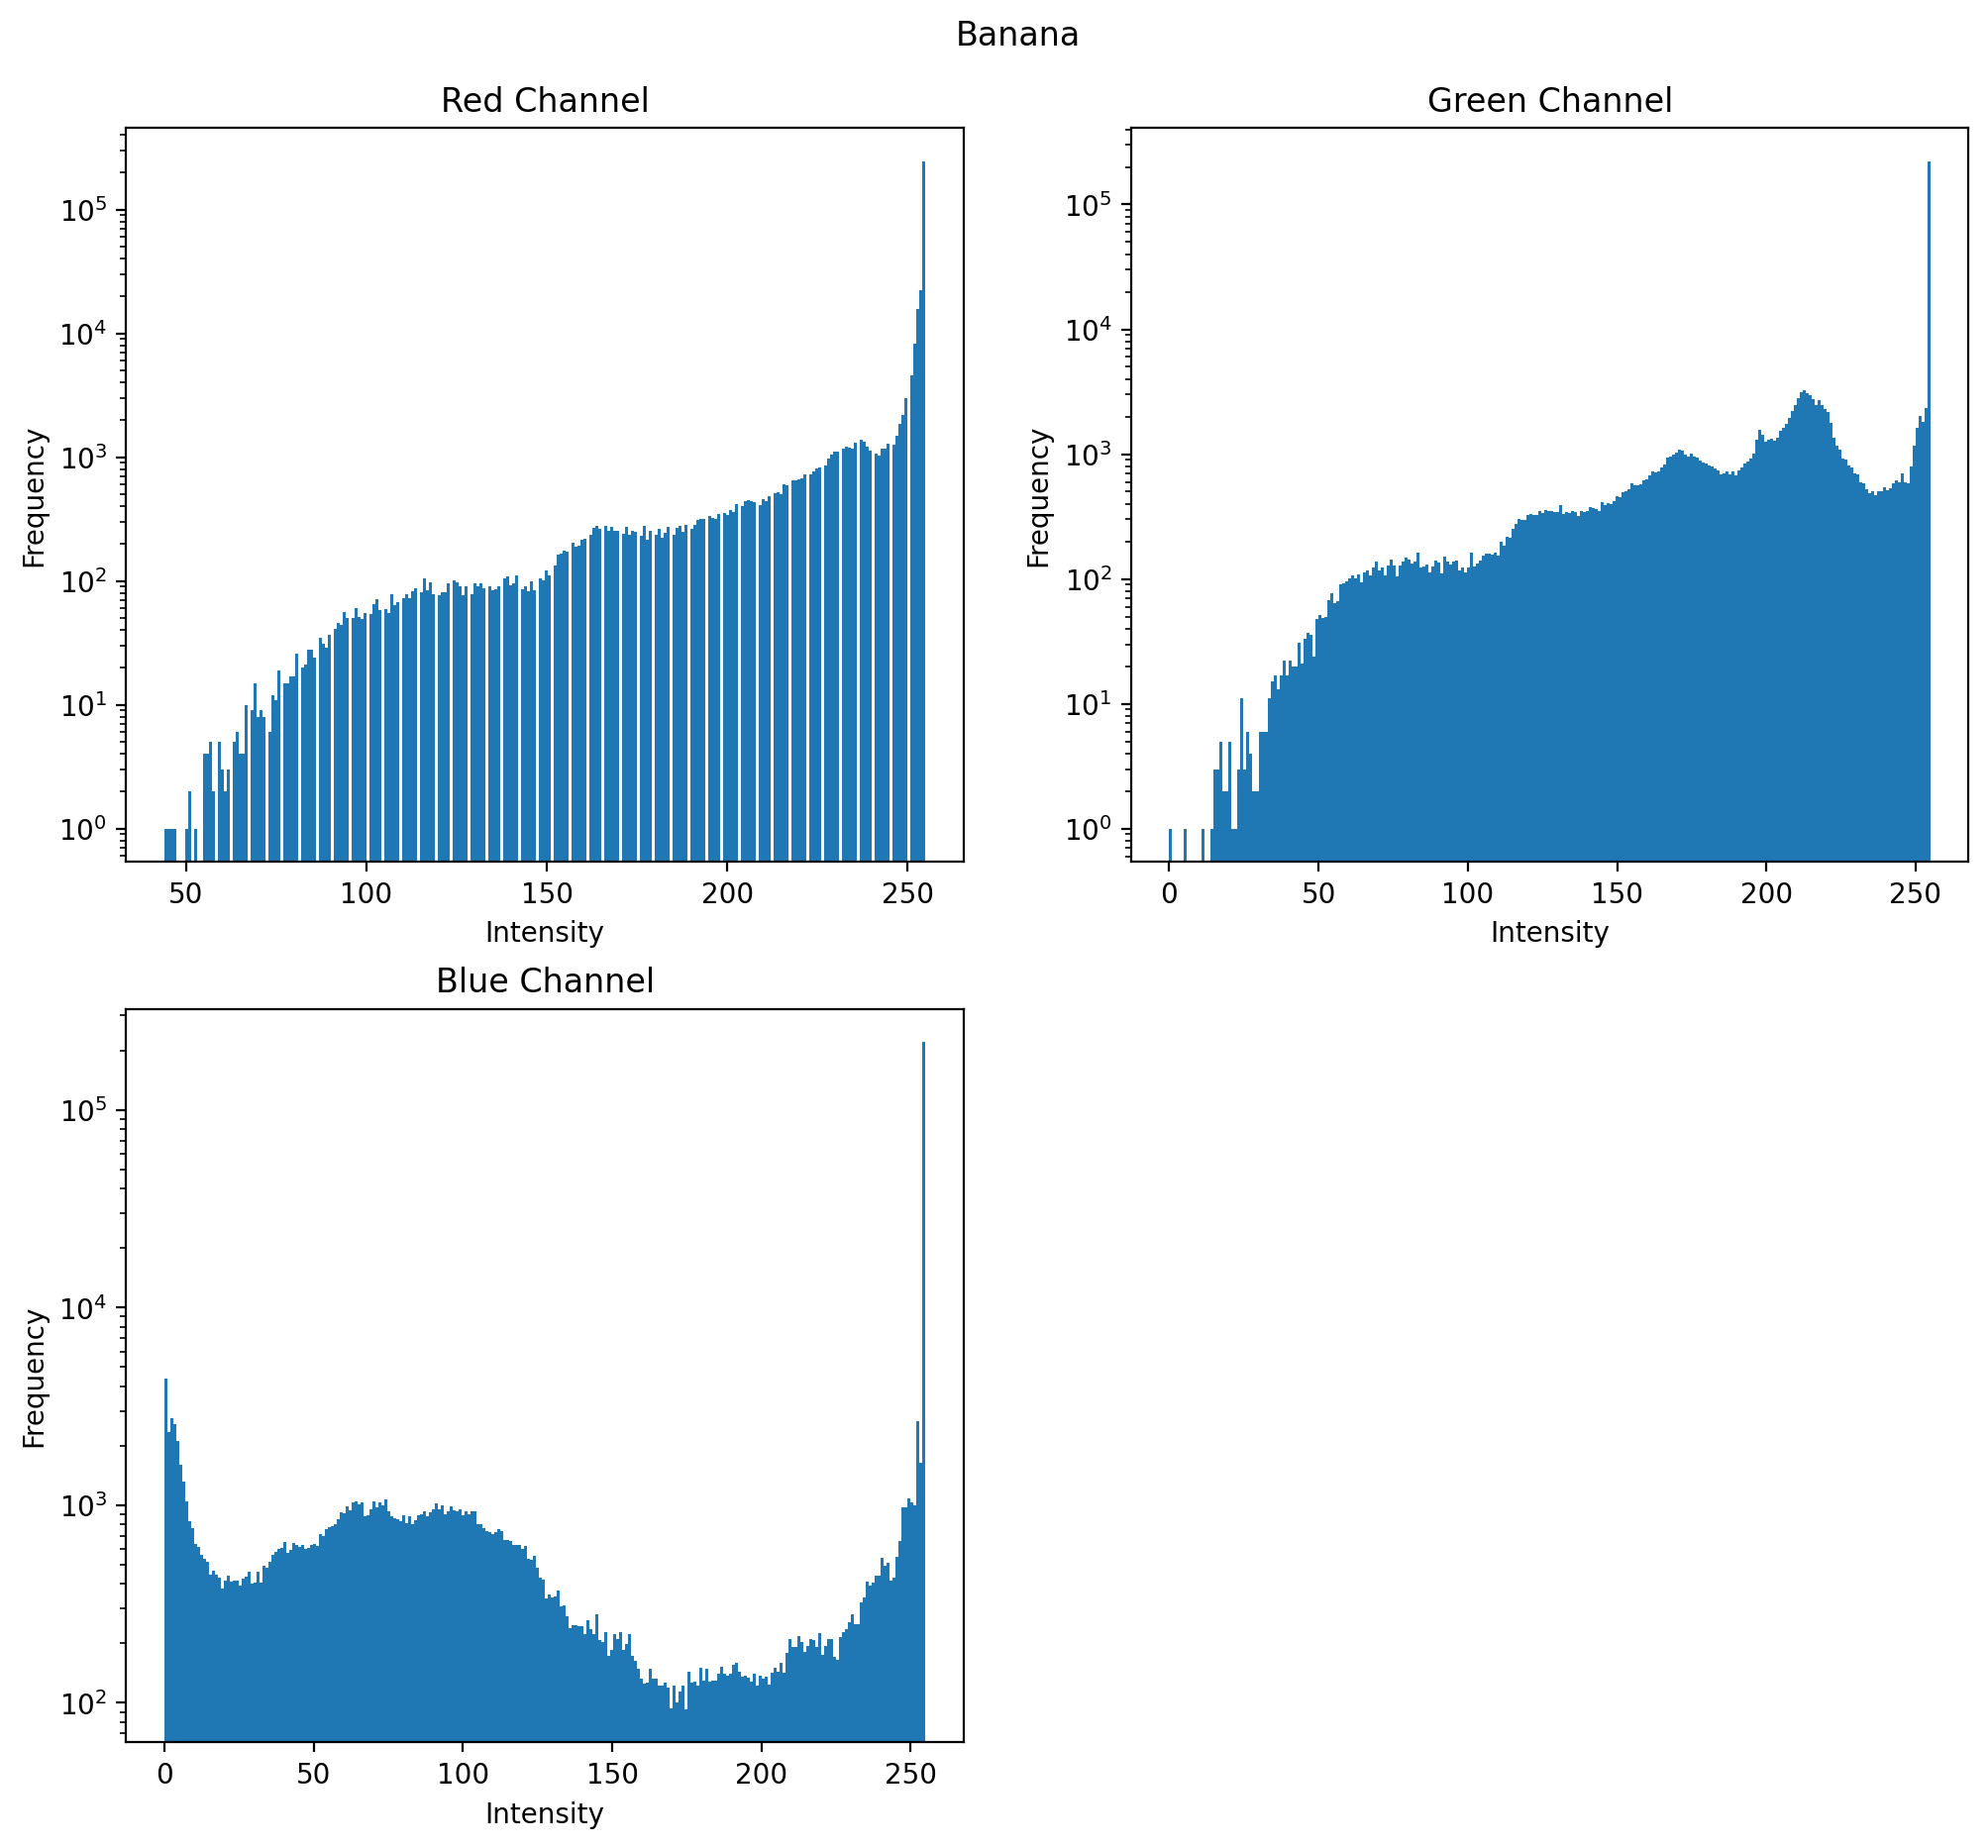

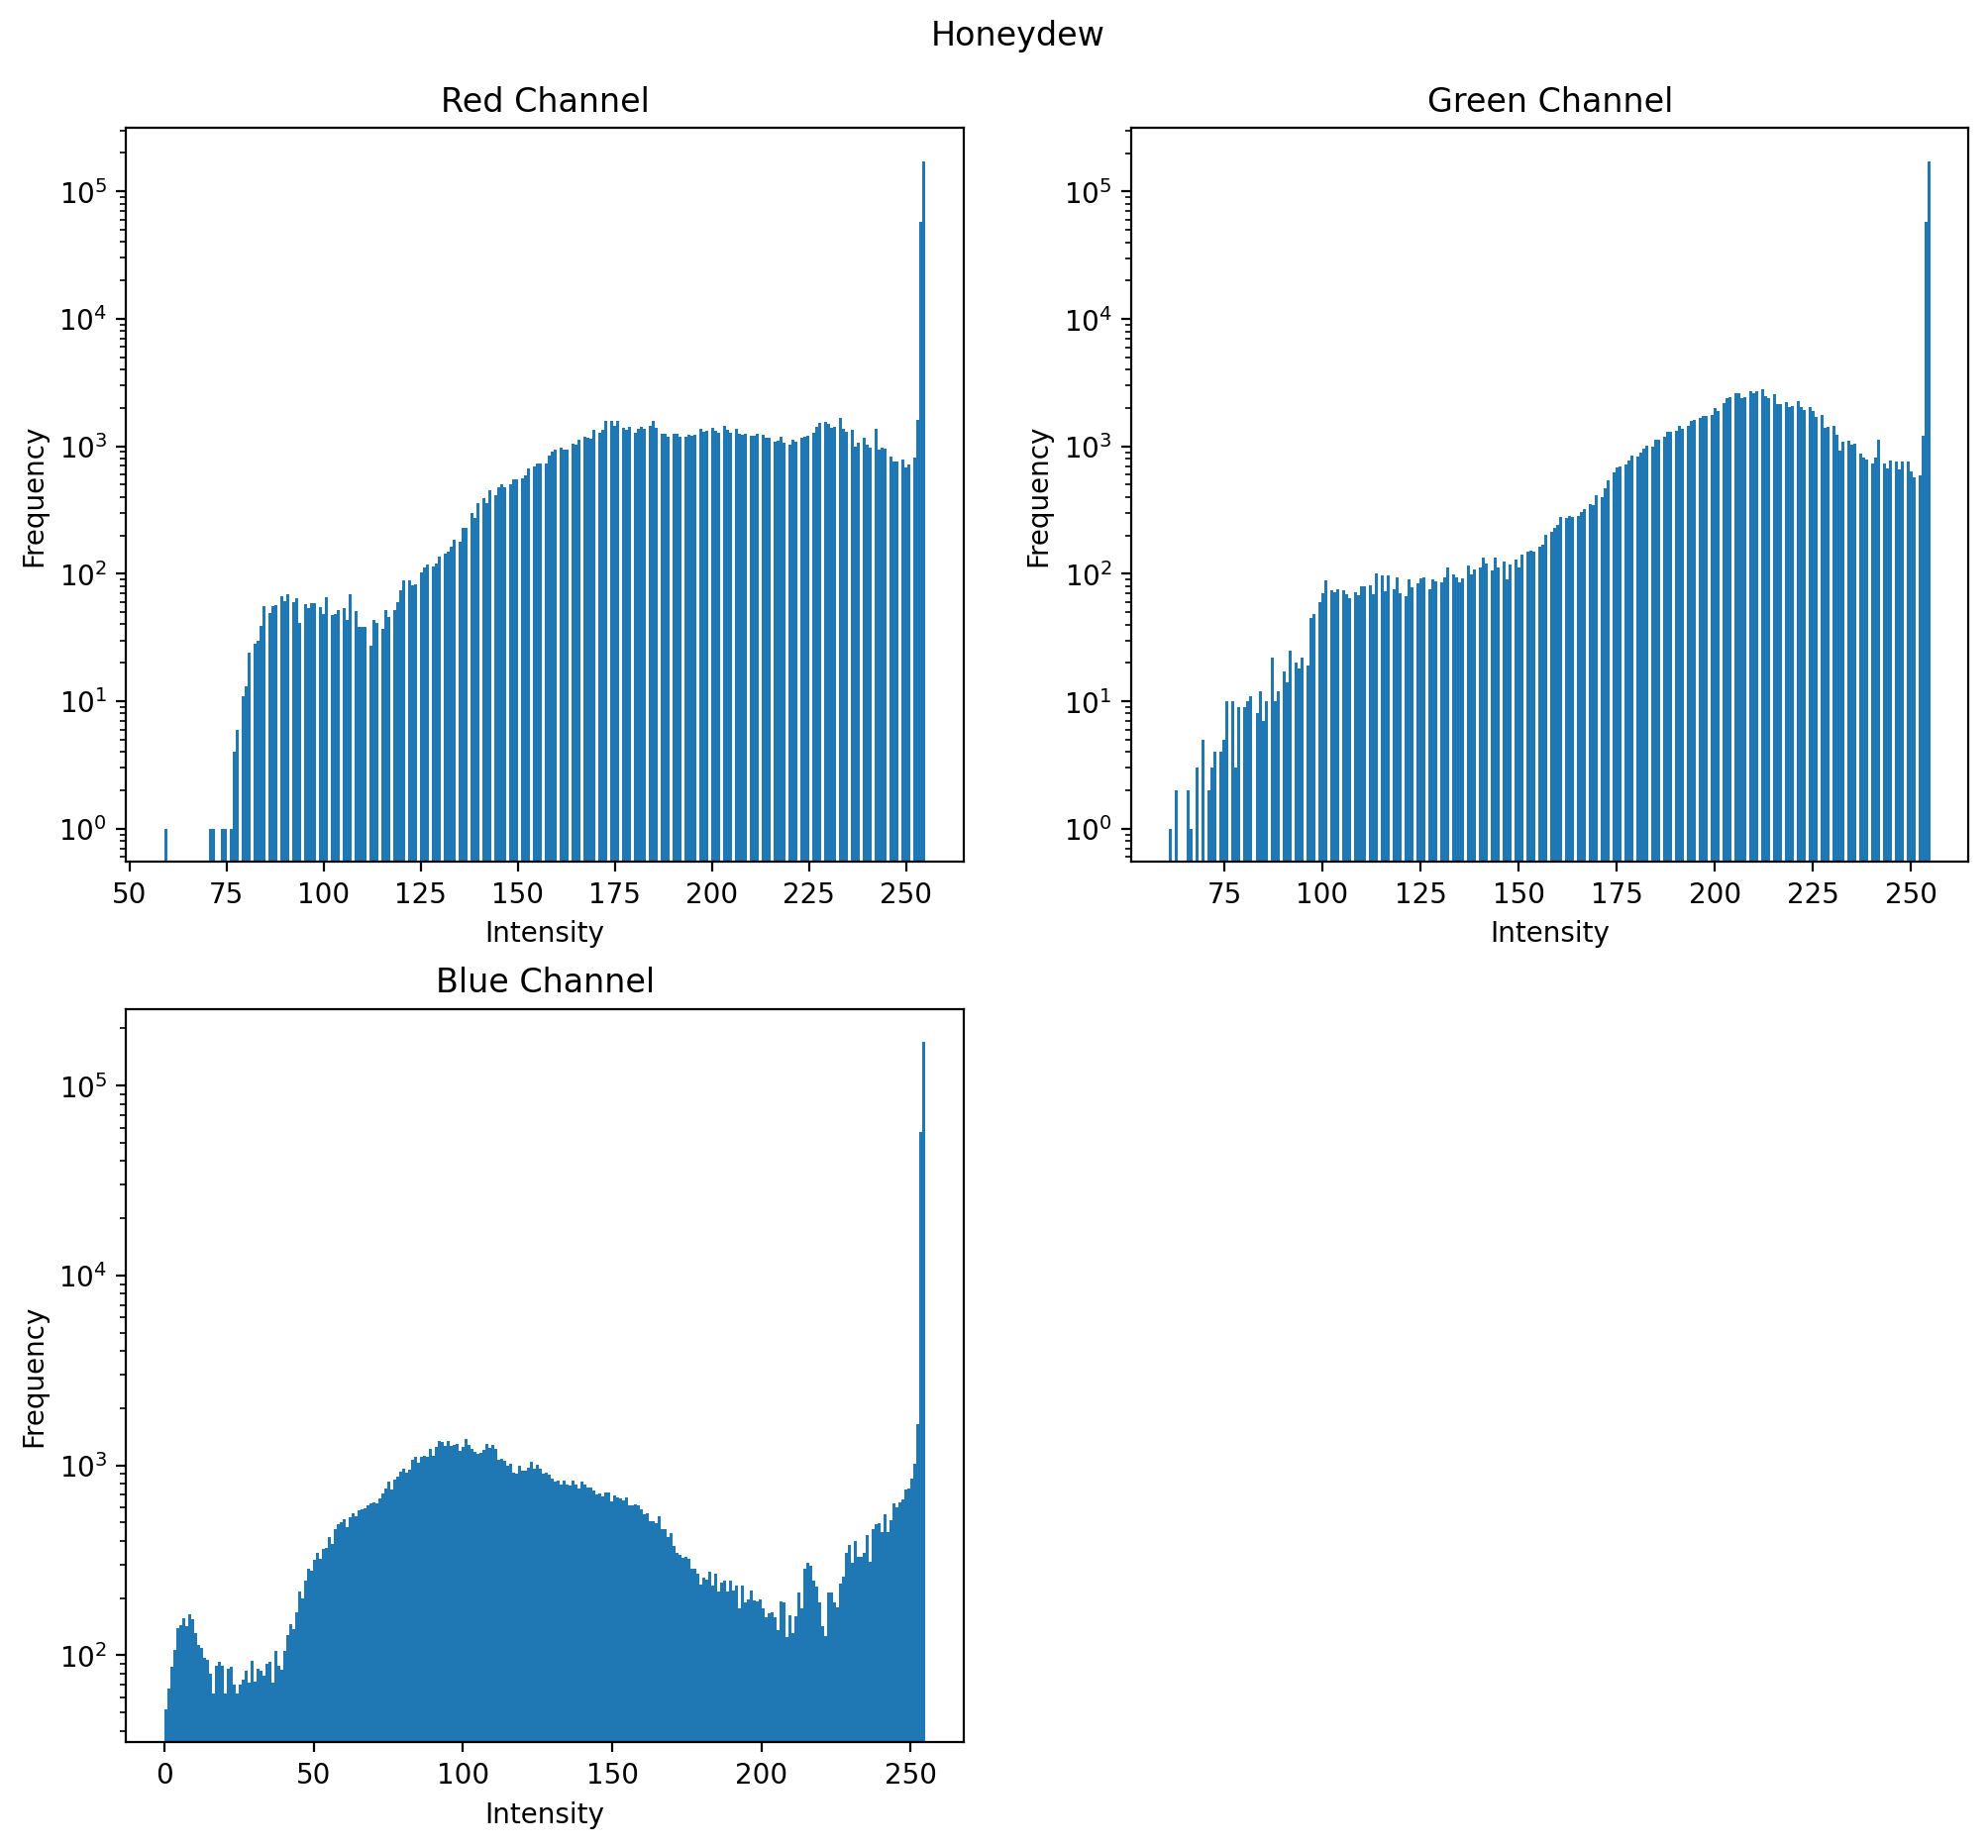

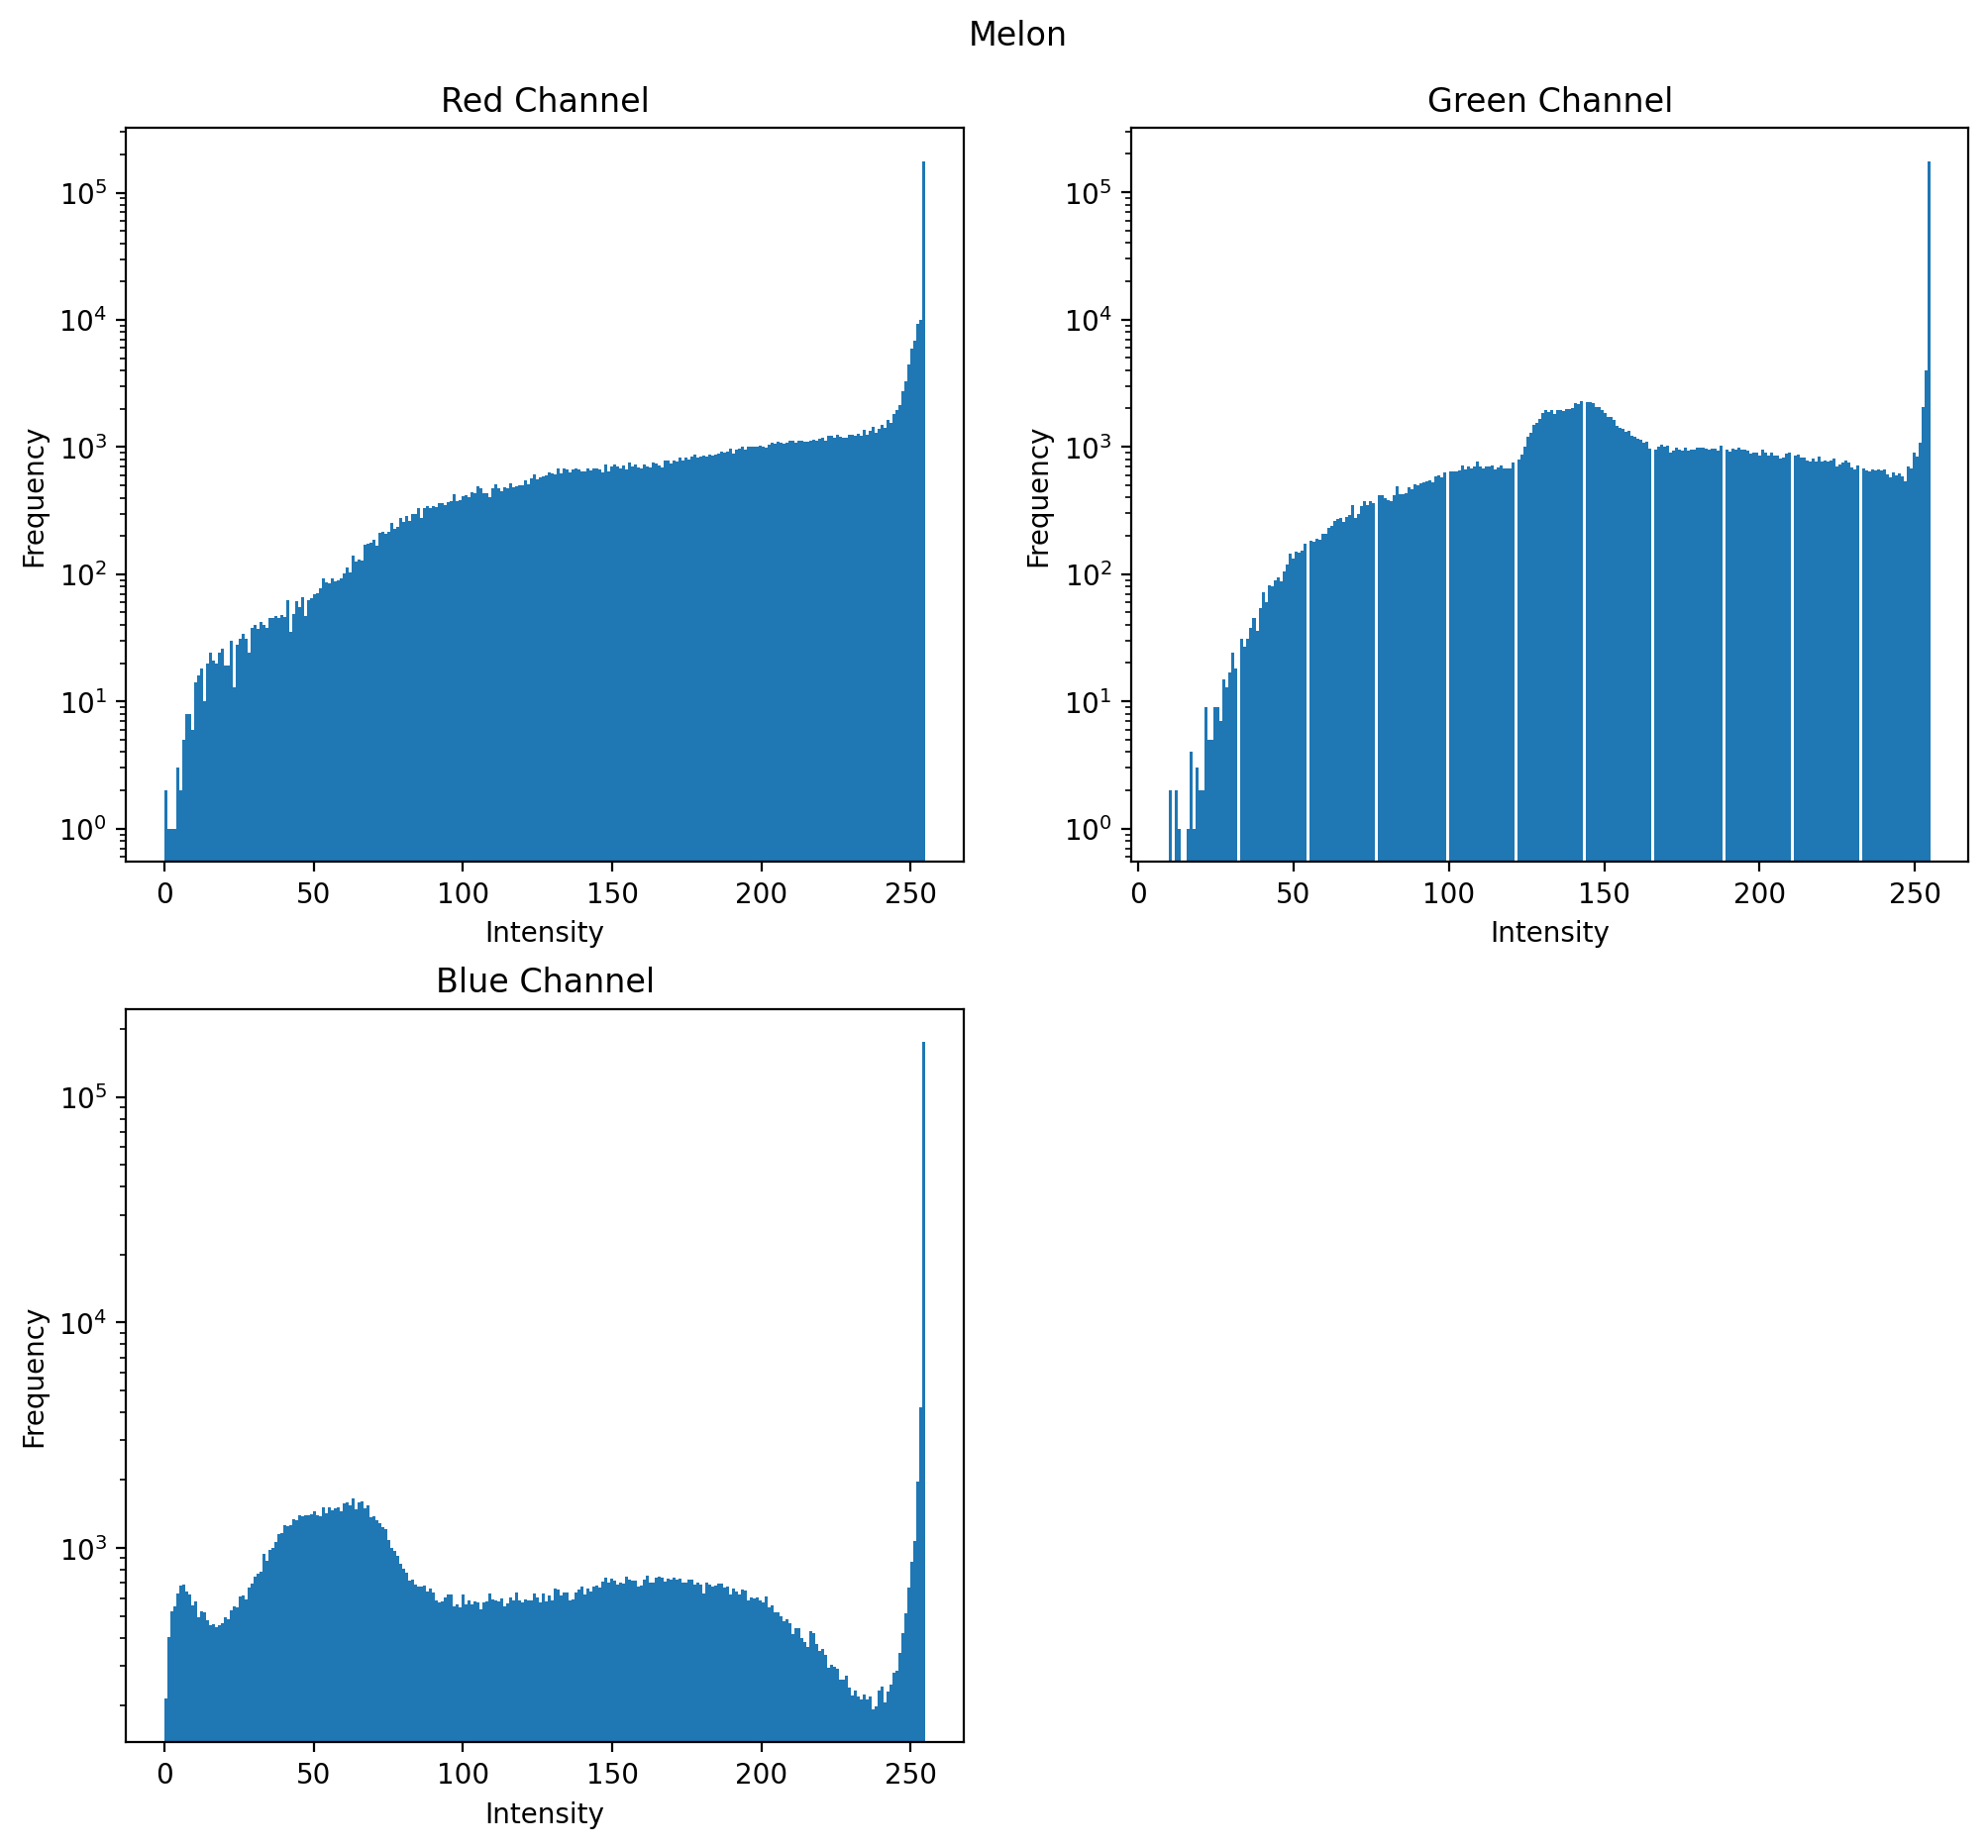

In [7]:
title = ["Apple", "Orange", "Banana", "Honeydew", "Melon"]

for i in range(len(R)):
  plot_histograms(title[i], R[i], G[i], B[i])

In [8]:
X_train = []
y_train = range(len(title))

max_len = 0

for i in range(len(R)):
  features = np.concatenate([R[i], G[i], B[i]])
  max_len = max(max_len, features.shape[0])

  X_train.append(features)

In [9]:
for idx, features in enumerate(X_train):
  if features.shape[0] < max_len:
    features_padded = np.pad(features, (0, max_len - features.shape[0]), constant_values=-1)
    X_train[idx] = features_padded

  print(X_train[idx].shape)

(1080000,)
(1080000,)
(1080000,)
(1080000,)
(1080000,)


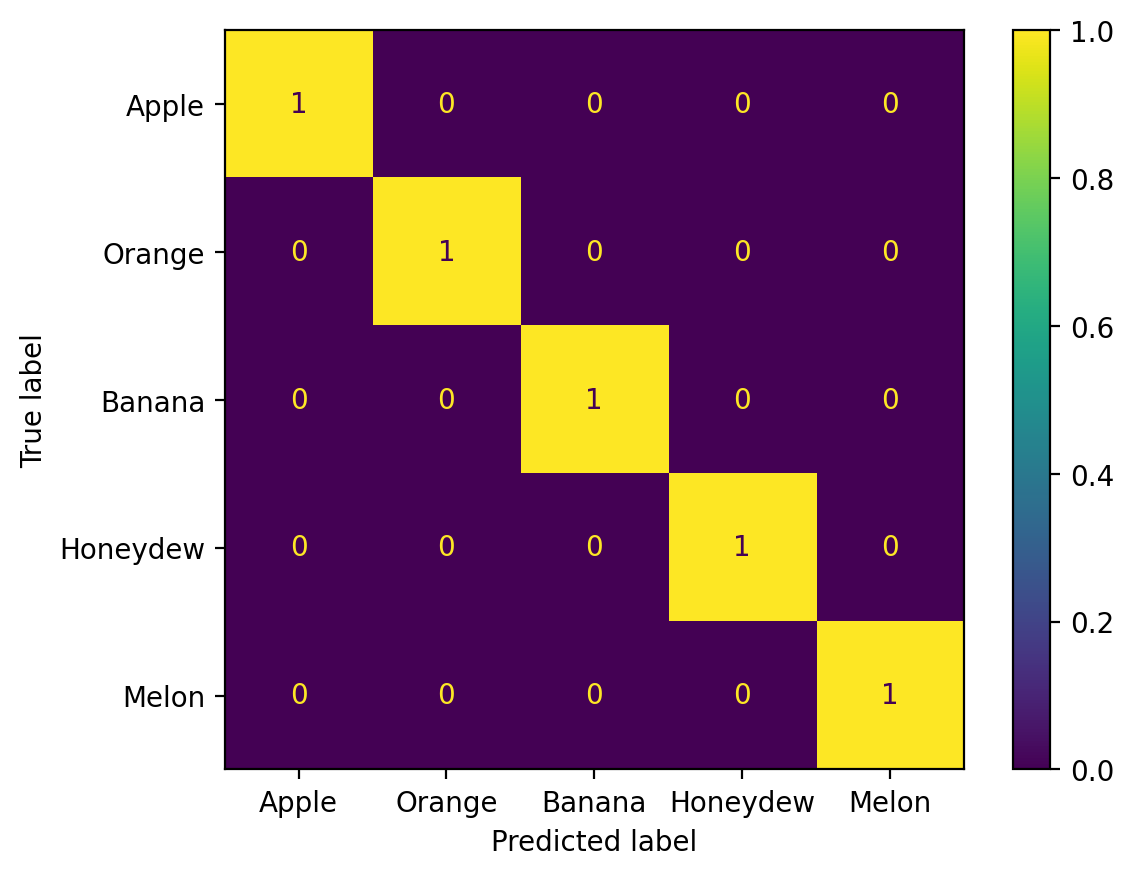

In [10]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=title)
disp.plot()

plt.show()